# 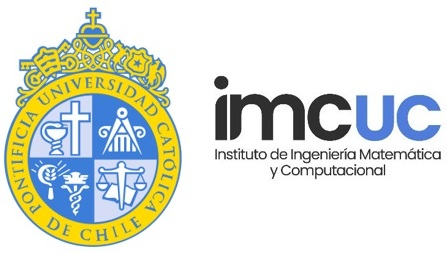  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2023-2**<br>
**Profesor:** Rodrigo A. Carrasco <br>
---

# <h1><center>Clase 24: Aprendizaje Supervisado: Clasificación</center></h1>

En este notebook aplicaremos las herramientas implementadas en las librerías de Python `statsmodels` y `scipy` para realizar clasificación.

## Caso de Estudio: rendimiento avisos en una red social

Los métodos de clasificación corresponden a algortimos de aprendizaje supervisado que permiten predecir el valor de una variable categórica a partir de un conjunto de variables predictoras, que a su vez pueden ser numéricas o categóricas.

Cuando la variable de salida es binaria, podemos aplicar el modelo de regresión logística. En el caso que la variable dependiente tenga 3 o más valores posibles, es de utilidad el método de clasificación kNN (que también se puede aplicar al caso binario).

### Descripción del Dataset

El archivo `Social_Network_Ads.csv` tiene, para cada usuario, algunas características de la persona y si ha comprado o no en producto mostrado en el aviso.

### Objetivo

El objetivo es enteder cómo diferenciar a los usuarios para identificar qué características son relevantes para identificarlos como personas que compran o no el producto.

## 1. Datos a analizar

El archivo `Social_Network_Ads.csv` es la base de datos a usar en este notebook.

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import sklearn as sk

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
# seleccionamos las variables predictoras y la variable dependiente
X = df[['Age','EstimatedSalary']]
y = df['Purchased']

## 2. Clasificación kNN

###  Clasificación binaria con normalización.

En este ejemplo, usaremos un dataset de RRSS para predecir si una persona realiza o no una compra luego de hacer clikc en un aviso publicitario en la red. Para ello, se requiere crear un clasificador que clasifique a cada usuario en la categoría correcta en base a sus características: compra o no compra.

Como predictores, utilizaremos la edad y salario estimado del usuario.

Text(0, 0.5, 'N')

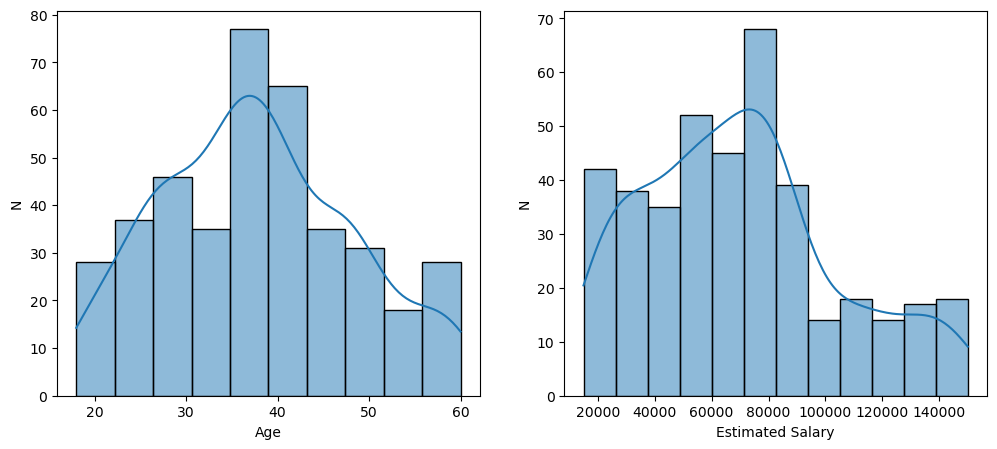

In [4]:
#veamos la distribución de valores originales
fig,(ax1,ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(ax=ax1, data=X, x='Age', kde=True)
ax1.set_xlabel('Age')
ax1.set_ylabel('N')

sns.histplot(ax=ax2, data=X, x='EstimatedSalary', kde=True)
ax2.set_xlabel('Estimated Salary')
ax2.set_ylabel('N')

In [5]:
from sklearn.preprocessing import StandardScaler

# normalización con StandardScaler
sc = StandardScaler()

X_sc = sc.fit_transform(X) #esto genera un np.array

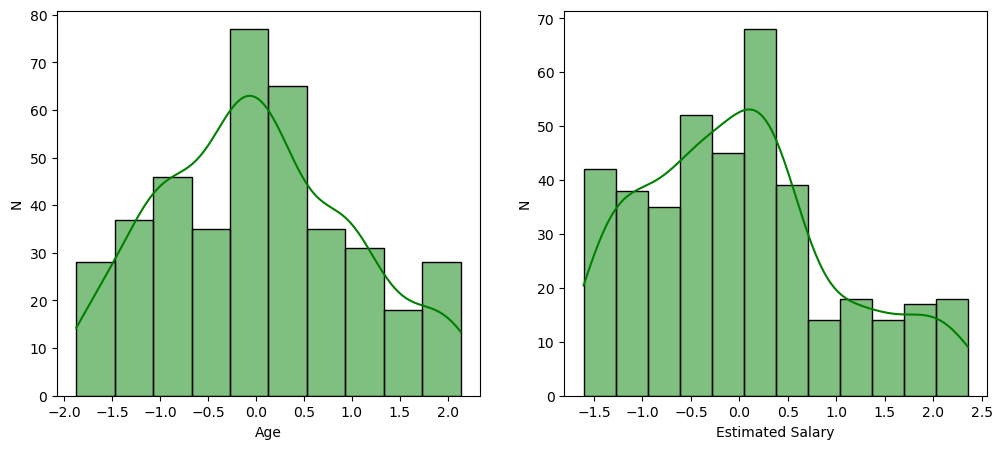

In [6]:
# la distribución de valores normalizados
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
sns.histplot(ax=ax1, data=X_sc[:,0], kde=True, color='green')
ax1.set_xlabel('Age')
ax1.set_ylabel('N')

sns.histplot(ax=ax2, data=X_sc[:,1], kde=True, color='green')
ax2.set_xlabel('Estimated Salary')
ax2.set_ylabel('N')
fig.savefig('scaled.png', dpi=300, bbox_inches='tight')

Clasificación usando kNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [8]:
# datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.3, random_state = 5)

In [9]:
len(X_train)

280

In [10]:
# definimos el modelo y especificamos sus hiperparámetros
classifier = KNeighborsClassifier(n_neighbors = 15)

# ajustamos a los datos de entrenamiento
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [11]:
#predecimos las categorías para el dataset de prueba
y_pred_test = classifier.predict(X_test)

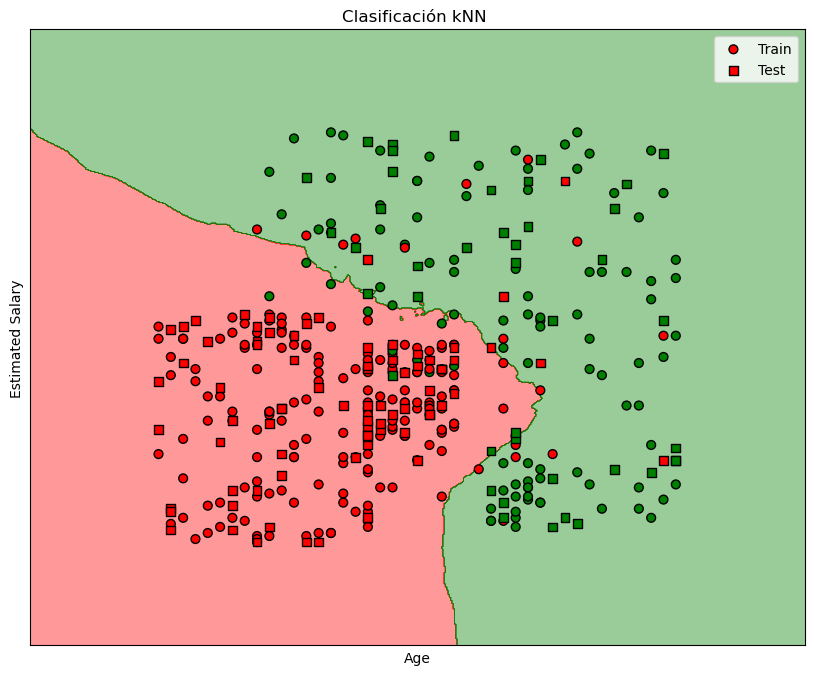

In [12]:
#visualizemos los resultados

from matplotlib.colors import ListedColormap

#creamos una grilla con valores de X1 (Age) y X2 (EstimatedSalary)
X1, X2 = np.meshgrid(np.arange(X_train[:,0].min()-1, X_train[:,0].max()+1,0.01),
                     np.arange(X_train[:,1].min()-1,X_train[:,1].max()+1,0.01))


#predecimos la clase de salida para cada par de puntos (X1,X2) de la grilla
#X1, X2 son matrices con los valores en cada punto de la grilla. 
#X1.ravel() son las versiones "flattened". Para la predicción, transformamos X1, X2 en vectores
# luego con reshape volvemos a darle la forma de matrix (grilla) al vector de resultados
X_grid = np.array([X1.ravel(), X2.ravel()]).T
mesh_predict = classifier.predict(X_grid).reshape(X1.shape)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
 
#grafico de contornos de mesh_predict, para visualizar la frontera entre las dos clases
im = ax.contourf(X1, X2, mesh_predict, alpha = 0.4, cmap = ListedColormap(('red', 'green')))
#plot de los datos de entrenamiento
ax.scatter(X_train[:,0], X_train[:,1], c=y_train, s=40, edgecolors='k', cmap=ListedColormap(('red', 'green')), label='Train')
ax.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='s', s=40, edgecolors='k', cmap=ListedColormap(('red', 'green')), label='Test')
         
ax.set_title('Clasificación kNN ')
ax.set_xlabel('Age')
ax.set_ylabel('Estimated Salary')

xlabels = np.arange(10,70,10)
xticks = (xlabels-X_train[:,0].mean())/X_train[:,0].std()
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels, fontsize=14)

ylabels = np.arange(10000,180000,20000)
yticks = (ylabels-X_train[:,1].mean())/X_train[:,1].std()
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels, fontsize=14)

# limites de los ejes
ax.set_xlim(X1.min(), X1.max())
ax.set_ylim(X2.min(), X2.max())
ax.legend()

### ¿Qué tan buena resultó la clasificación?

Para evaluar la calidad de la clasificación, calculamos la matrix de confusión y las métricas de rendimiento considerando las predicciones y clases reales de los datos de prueba.

Estas métricas están implementadas en el módulo `sklearn.metrics`.

Confusion matrix: [[72  6]
 [ 3 39]]
Accuracy: 0.925
Recall: 0.9285714285714286
Precision: 0.8666666666666667
F score: 0.896551724137931
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        78
           1       0.87      0.93      0.90        42

    accuracy                           0.93       120
   macro avg       0.91      0.93      0.92       120
weighted avg       0.93      0.93      0.93       120



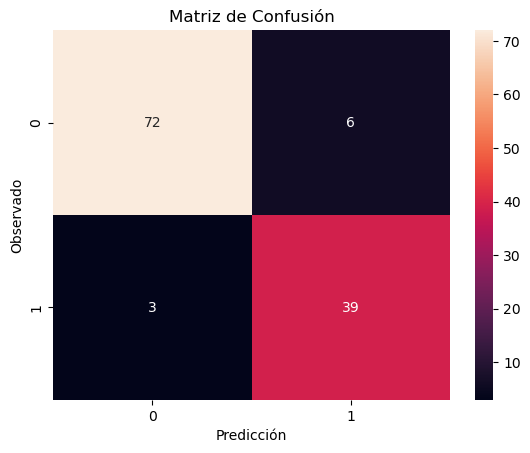

In [13]:
from sklearn import metrics

#matriz de confusión
cm = metrics.confusion_matrix(y_test, y_pred_test)

print('Confusion matrix:', cm)

#graficamos la matriz de confusión
sns.heatmap(cm, annot=True)
plt.ylabel('Observado')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')

accuracy=metrics.accuracy_score(y_test,y_pred_test)
print('Accuracy:',accuracy) #(72+37)/120

recall=metrics.recall_score(y_test,y_pred_test)
print('Recall:',recall) #21/32

precision=metrics.precision_score(y_test,y_pred_test)
print('Precision:',precision) #21/25

fscore=metrics.f1_score(y_test,y_pred_test)
print('F score:',fscore)

#también podemos imprimir un resumen de las métricas de clasificación
report0 = metrics.classification_report(y_test,y_pred_test)
print(report0)

### Desafío

Los 4 primeros en lograr este desafío obtendrán 0.2 en la Tarea 3. El desafío es el siguiente: deben generar dos gráficos. El primero, es un gráfico con 4 subgráficos, en los cuales se haga el gráfico de clasificación kNN pero para valores de k = 2, 5, 10 y 15. El segundo gráfico, debe mostrar la métrica de `accuracy` de cada modelo (para el conjunto de entrenamiento y prueba por separado), con respecto al valor k usado.

La siguiente es la respuesta que compartió Benjamín Vásquez.

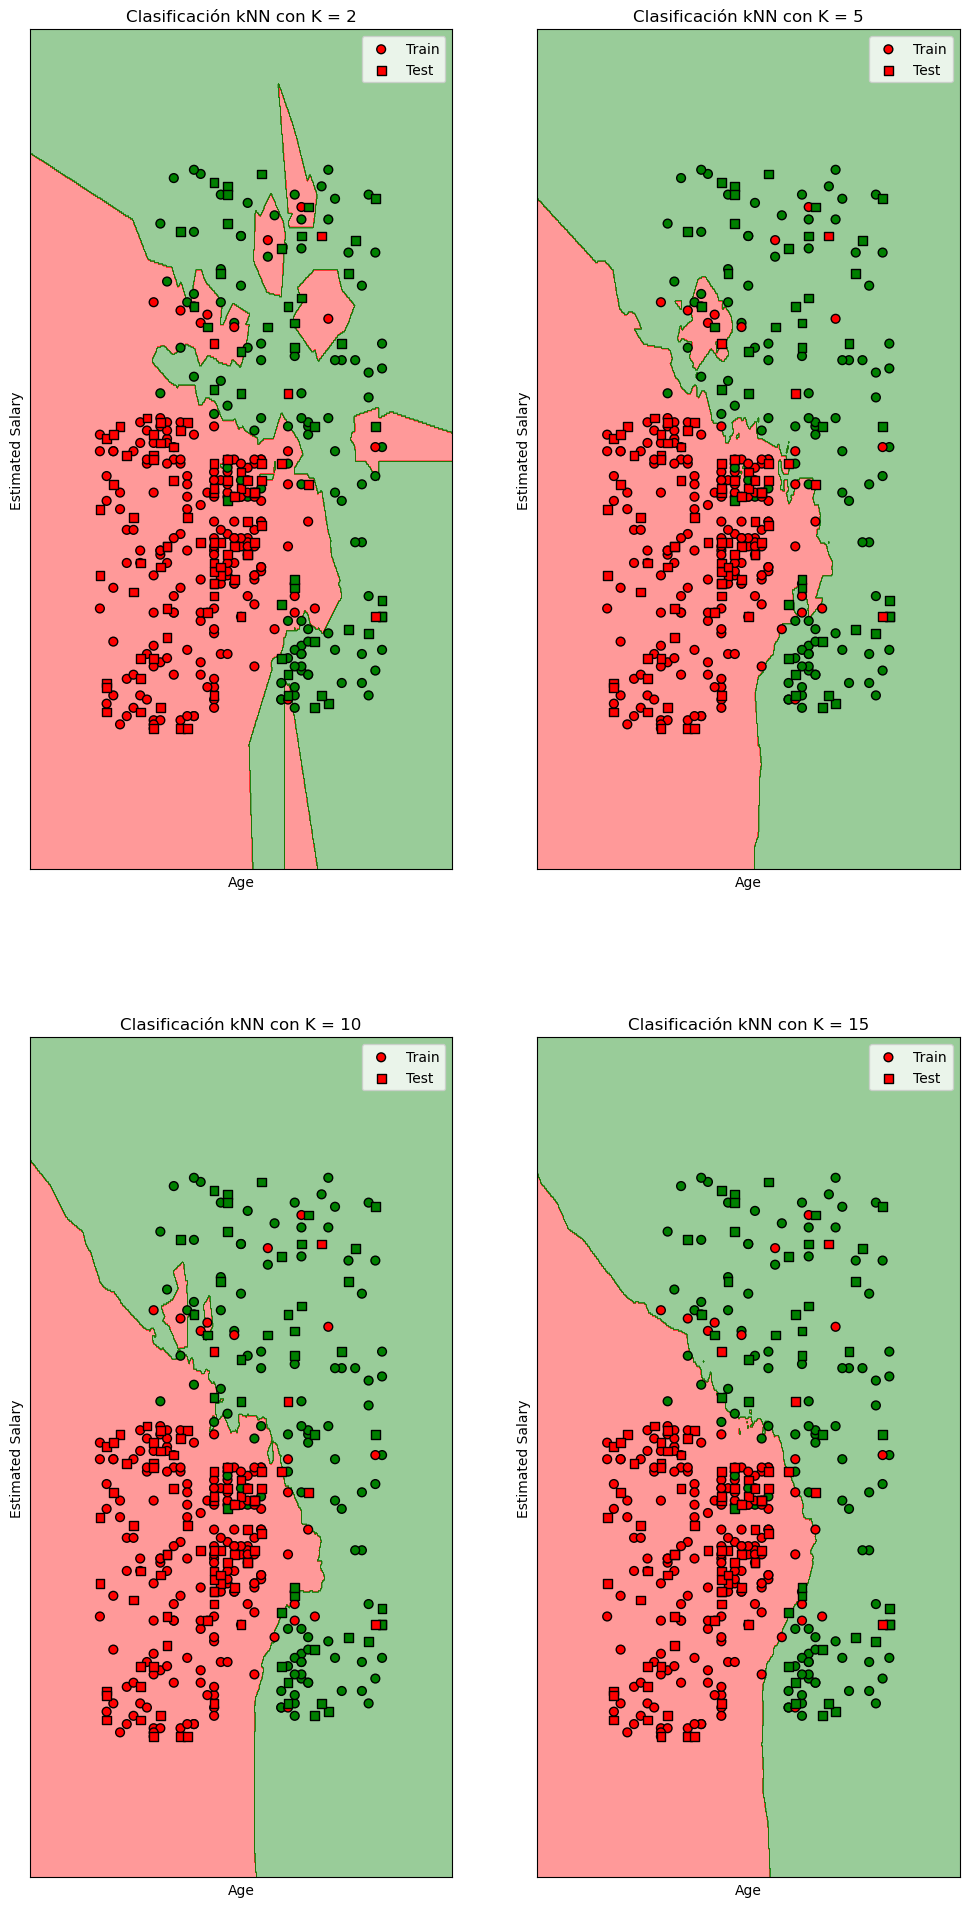

In [14]:
fug, ax = plt.subplots(2, 2, figsize=(12,24))
Ks = [2, 5, 10, 15]

for k, ax in zip(Ks, ax.ravel()):

    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)

    X_grid = np.array([X1.ravel(), X2.ravel()]).T
    mesh_predict = classifier.predict(X_grid).reshape(X1.shape)

    #grafico de contornos de mesh_predict, para visualizar la frontera entre las dos clases
    im = ax.contourf(X1, X2, mesh_predict, alpha = 0.4, cmap = ListedColormap(('red', 'green')))
    #plot de los datos de entrenamiento
    ax.scatter(X_train[:,0], X_train[:,1], c=y_train, s=40, edgecolors='k', cmap=ListedColormap(('red', 'green')), label='Train')
    ax.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='s', s=40, edgecolors='k', cmap=ListedColormap(('red', 'green')), label='Test')
             
    ax.set_title(f'Clasificación kNN con K = {k}')
    ax.set_xlabel('Age')
    ax.set_ylabel('Estimated Salary')
    
    xlabels = np.arange(10,70,10)
    xticks = (xlabels-X_train[:,0].mean())/X_train[:,0].std()
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels, fontsize=14)
    
    ylabels = np.arange(10000,180000,20000)
    yticks = (ylabels-X_train[:,1].mean())/X_train[:,1].std()
    ax.set_yticks(yticks)
    ax.set_yticklabels(ylabels, fontsize=14)
    
    # limites de los ejes
    ax.set_xlim(X1.min(), X1.max())
    ax.set_ylim(X2.min(), X2.max())
    ax.legend()

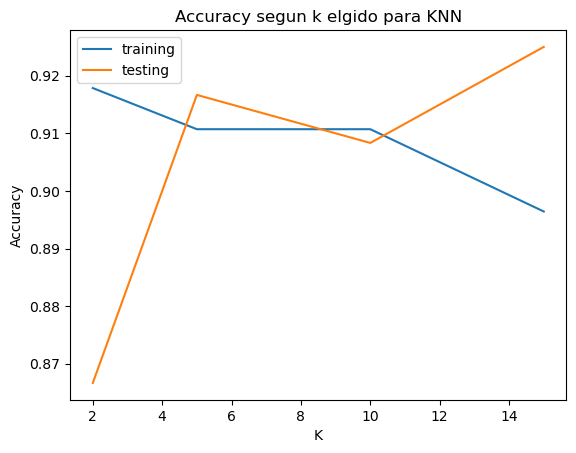

In [15]:
Ks = [2, 5, 10, 15]
ac_test = []
ac_train = []

for k in Ks:

    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    
    y_pred_test = classifier.predict(X_test)
    y_pred_train = classifier.predict(X_train)
    
    accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
    accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
    ac_test.append(accuracy_test)
    ac_train.append(accuracy_train)

fig, ax = plt.subplots()
ax.plot(Ks, ac_train, label = "training")
ax.plot(Ks, ac_test, label = 'testing')
ax.set(xlabel='K', ylabel='Accuracy',
       title='Accuracy segun k elgido para KNN')
ax.legend()

plt.show()

## 3. Clasificación por Árboles de Decisión

Repetiremos el ejercicio anterior, pero ahora usando árboles de decisión como herramienta de ML.

In [16]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [17]:
df['Gender'] = df['Gender'].map({'Female':1,'Male':0})
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [18]:
# seleccionamos las variables predictoras y la variable dependiente
X = df[['Age','EstimatedSalary','Gender']]
y = df['Purchased']

#datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [19]:
from sklearn.tree import DecisionTreeClassifier

#definimos el modelo y especificamos sus hiperparámetros
classifier = DecisionTreeClassifier(max_depth=6)

#ajustamos a los datos de entrenamiento
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

[Text(0.44696969696969696, 0.9285714285714286, 'x[0] <= 43.5\ngini = 0.451\nsamples = 280\nvalue = [184, 96]'),
 Text(0.22727272727272727, 0.7857142857142857, 'x[1] <= 89500.0\ngini = 0.259\nsamples = 203\nvalue = [172, 31]'),
 Text(0.09090909090909091, 0.6428571428571429, 'x[0] <= 36.5\ngini = 0.078\nsamples = 172\nvalue = [165, 7]'),
 Text(0.06060606060606061, 0.5, 'gini = 0.0\nsamples = 114\nvalue = [114, 0]'),
 Text(0.12121212121212122, 0.5, 'x[1] <= 72500.0\ngini = 0.212\nsamples = 58\nvalue = [51, 7]'),
 Text(0.06060606060606061, 0.35714285714285715, 'x[1] <= 70500.0\ngini = 0.048\nsamples = 41\nvalue = [40, 1]'),
 Text(0.030303030303030304, 0.21428571428571427, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(0.09090909090909091, 0.21428571428571427, 'x[2] <= 0.5\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.06060606060606061, 0.07142857142857142, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.12121212121212122, 0.07142857142857142, 'gini = 0.0\nsamples = 4\nval

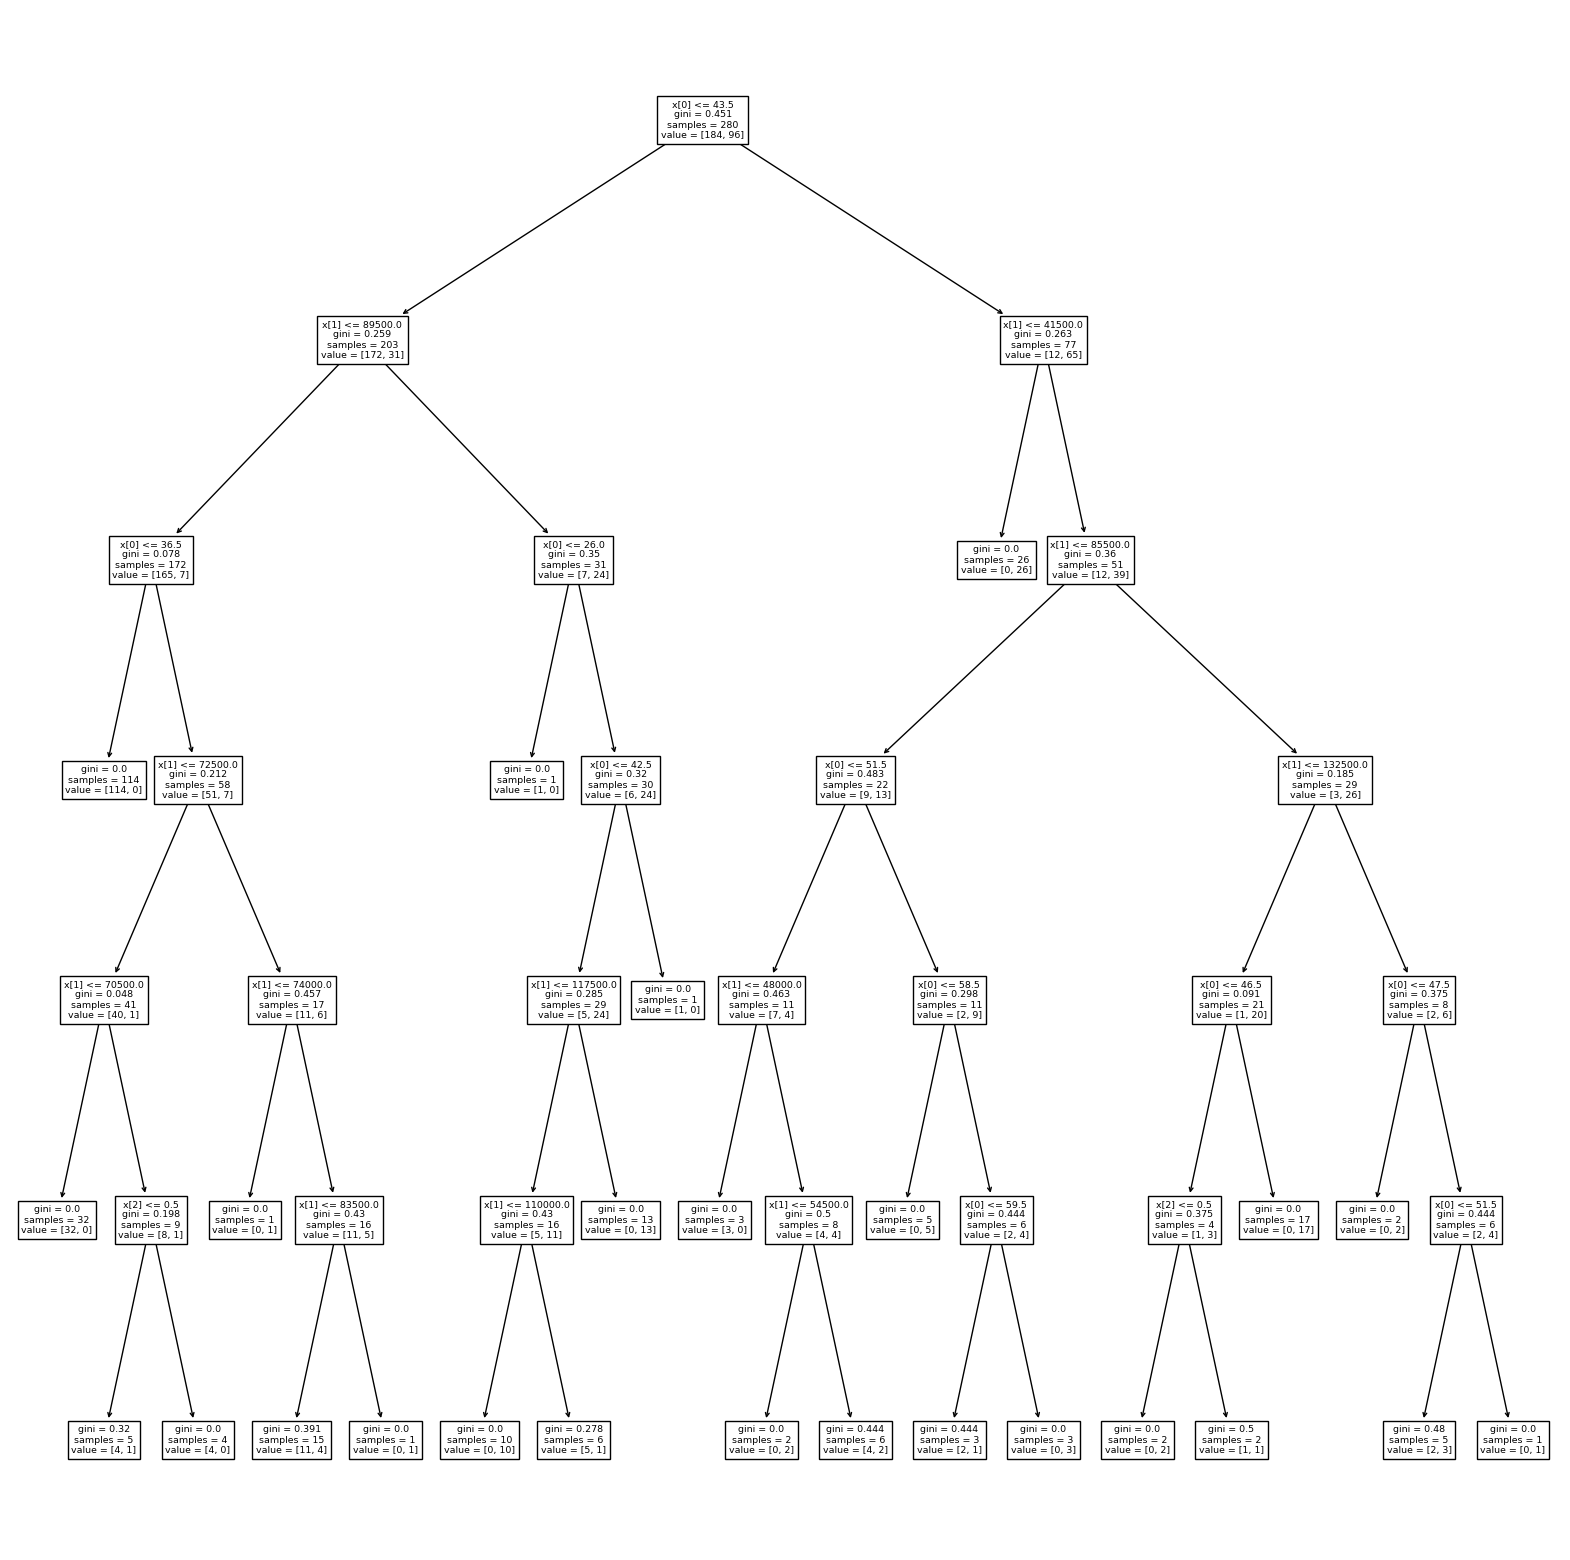

In [20]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
plot_tree(classifier, ax=ax)

In [21]:
#predecimos las categorías para el dataset de prueba
y_pred_test = classifier.predict(X_test)

In [22]:
X_train.head()

,Age,EstimatedSalary,Gender
35,35,27000,0
49,31,89000,1
284,48,141000,0
370,60,46000,1
398,36,33000,0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Clasificación Decision Trees - Female')

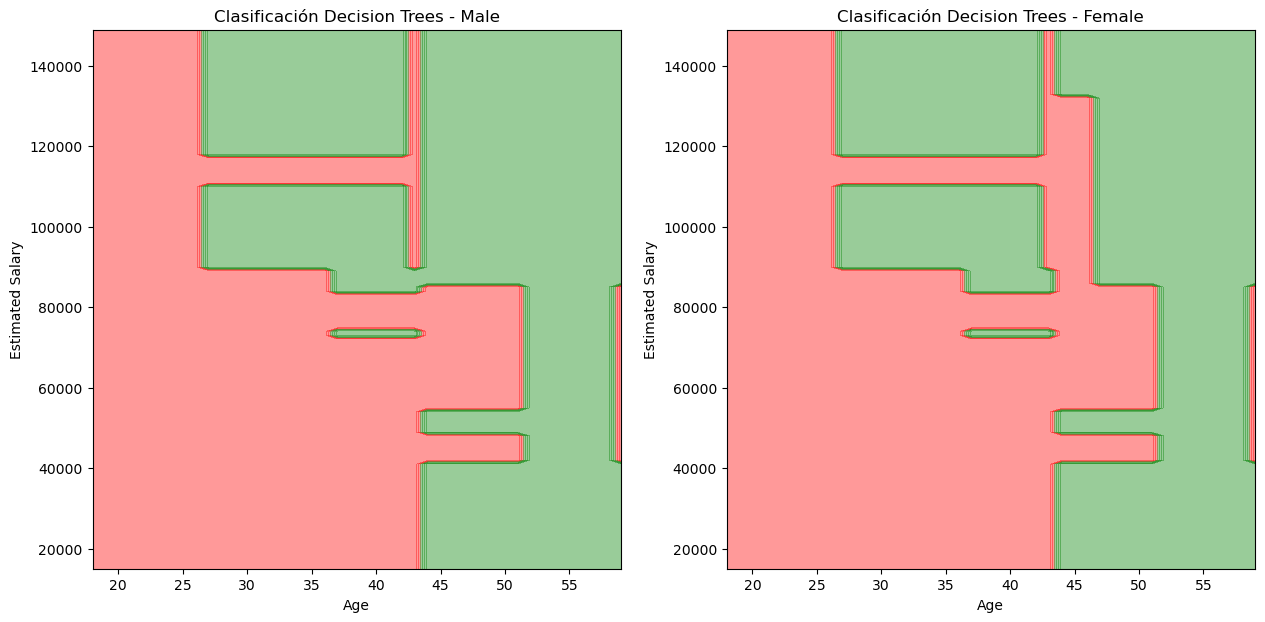

In [23]:
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#creamos una grilla con valores de X1 (Age) y X2 (EstimatedSalary)
X1, X2 = np.meshgrid(np.arange(X_train.Age.min(), X_train.Age.max(),1),
                     np.arange(X_train.EstimatedSalary.min(),X_train.EstimatedSalary.max(),1000))

X3_male = np.zeros(len(X1.ravel()))#male
X3_female = np.ones(len(X1.ravel()))#male

#male
X_grid = np.array([X1.ravel(), X2.ravel(),X3_male]).T  
mesh_predict = classifier.predict(X_grid).reshape(X1.shape)

im = ax1.contourf(X1, X2, mesh_predict, alpha = 0.4, cmap = ListedColormap(('red', 'green')))

#female
X_grid = np.array([X1.ravel(), X2.ravel(),X3_female]).T  
mesh_predict = classifier.predict(X_grid).reshape(X1.shape)
im = ax2.contourf(X1, X2, mesh_predict, alpha = 0.4, cmap = ListedColormap(('red', 'green')))


for ax in [ax1,ax2]:
    #ax.scatter(X_train.Age,X_train.EstimatedSalary,c=y_train,s=40,edgecolors='k',cmap=ListedColormap(('red', 'green')),label='Train')
    #ax.scatter(X_test.Age,X_test.EstimatedSalary,c=y_test,marker='s',s=40,edgecolors='k',cmap=ListedColormap(('red', 'green')),label='Test')

    ax.set_xlim(X1.min(), X1.max())
    ax.set_ylim(X2.min(), X2.max())
    ax.set_xlabel('Age')
    ax.set_ylabel('Estimated Salary')
    #ax.legend()
    
ax1.set_title('Clasificación Decision Trees - Male')
ax2.set_title('Clasificación Decision Trees - Female')

Confusion matrix: [[66  7]
 [ 6 41]]
Accuracy: 0.8916666666666667
Recall: 0.8723404255319149
Precision: 0.8541666666666666
F score: 0.8631578947368421
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        73
           1       0.85      0.87      0.86        47

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.89      0.89      0.89       120



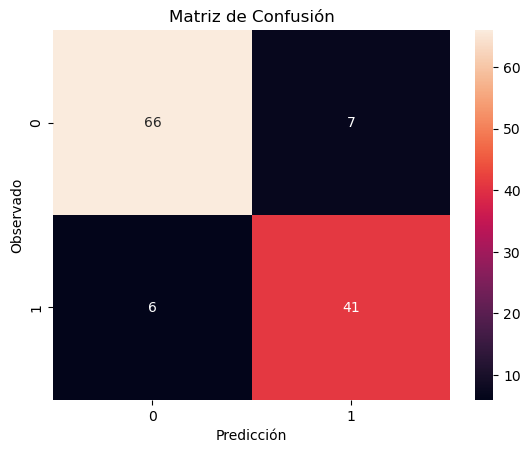

In [24]:
#matriz de confusión
cm = metrics.confusion_matrix(y_test, y_pred_test) #true,pred


print('Confusion matrix:',cm)

#graficamos la matriz de confusión
sns.heatmap(cm,annot=True)
plt.ylabel('Observado')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')

accuracy = metrics.accuracy_score(y_test,y_pred_test)
print('Accuracy:',accuracy) #(72+37)/120

recall = metrics.recall_score(y_test,y_pred_test)
print('Recall:',recall) #21/32

precision = metrics.precision_score(y_test,y_pred_test)
print('Precision:',precision) #21/25

fscore = metrics.f1_score(y_test,y_pred_test)
print('F score:',fscore)

#también podemos imprimir un resumen de las métricas de clasificación
report0 = metrics.classification_report(y_test,y_pred_test)
print(report0)